In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [6]:
stocks_tesla =  pd.read_csv('C:\\Users\\yss06\\Desktop\\python\\stock\\GHproject\\GH project - py\\sejun\\TSLA.csv', header=0, encoding="utf-8-sig")
stocks_tesla



,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-30,20.150667,20.306667,19.848000,20.209999,20.209999,108250500
1,2018-08-31,20.133333,20.354000,19.906668,20.110666,20.110666,80626500
2,2018-09-04,19.796000,19.879333,19.200001,19.263332,19.263332,125257500
3,2018-09-05,19.003332,19.118668,18.478666,18.716000,18.716000,115812000
4,2018-09-06,18.986668,19.411333,18.591999,18.730000,18.730000,112212000
...,...,...,...,...,...,...,...
1252,2023-08-23,229.339996,238.979996,229.289993,236.860001,236.860001,101077600
1253,2023-08-24,238.660004,238.919998,228.179993,230.039993,230.039993,99777400
1254,2023-08-25,231.309998,239.000000,230.350006,238.589996,238.589996,106345900
1255,2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

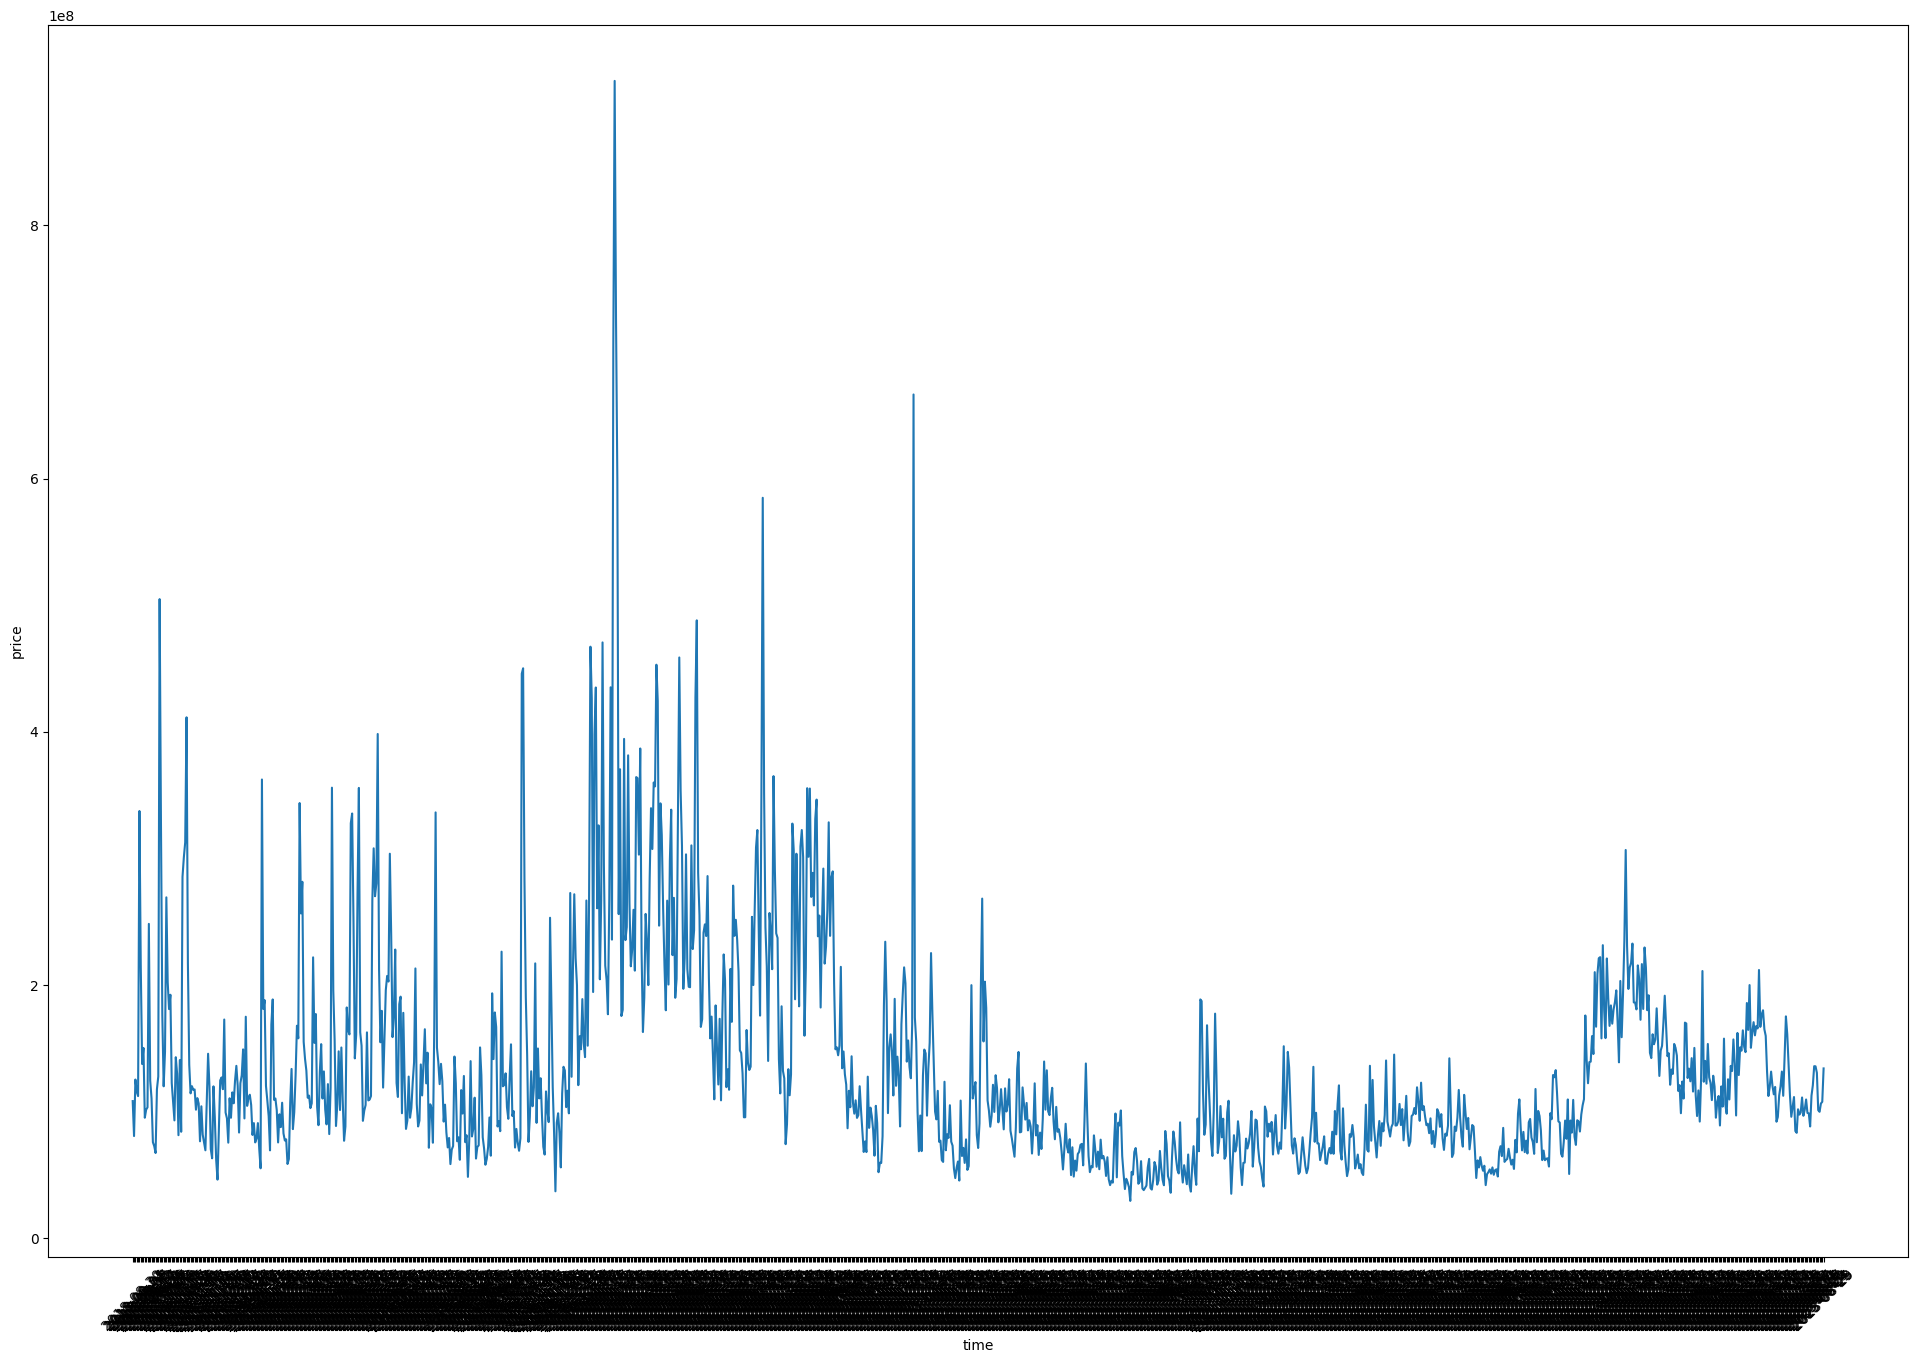

In [7]:
plt.figure(figsize=(24, 16))
sns.lineplot(y=stocks_tesla['Volume'], x=stocks_tesla['Date'])
plt.xlabel('time')
plt.ylabel('price')
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

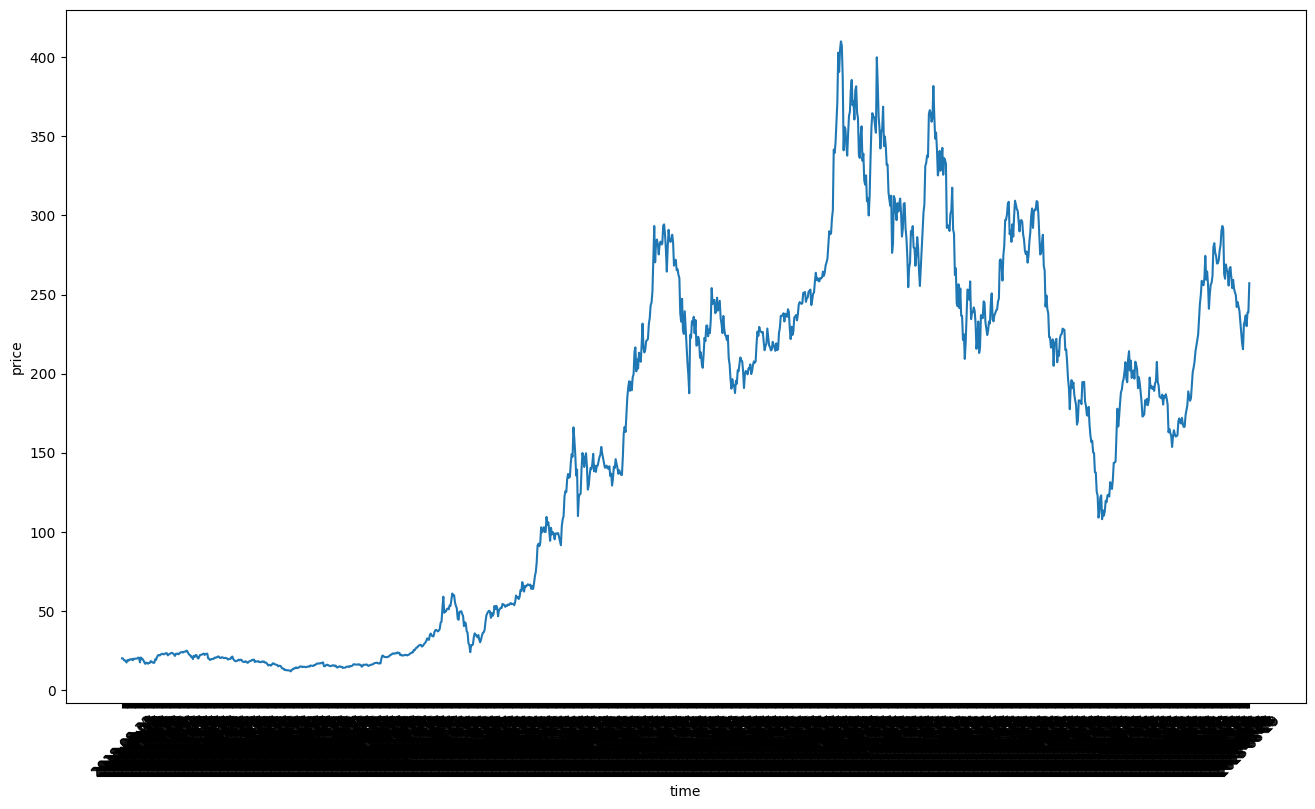

In [9]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stocks_tesla['Adj Close'], x=stocks_tesla['Date'])
plt.xlabel('time')
plt.ylabel('price')
plt.xticks(rotation=45)

In [10]:
stocks_tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,156.068584,159.652094,152.188131,156.016478,156.016478,1.352826e+08
std,112.626454,115.106564,109.817599,112.470960,112.470960,8.767400e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,23.756001,24.379999,23.466667,23.892668,23.892668,7.913400e+07
50%,178.050003,183.619995,175.330002,180.130005,180.130005,1.087860e+08
75%,244.853333,250.516663,239.696671,244.666672,244.666672,1.623843e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [12]:
stocks_tesla.isnull().sum()
# stocks_tesla.loc[stocks_tesla['Open'].isna()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [20]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_cols = ['Open','High','Low','Close','Adj Close','Volume'] #  정규화 대상 column 정의

scaled_df = scaler.fit_transform(stocks_tesla[scale_cols]) # 정규화 수행 by using scaler.fit_transform


#만약 결과 값들을 numpy로 만들지 않고 새로운 dataframe으로 만들고 싶다면 
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols) # 를 이용 <- 정규화된 새로운 DataFrame 생성
print(scaled_df)

          Open      High       Low     Close  Adj Close    Volume
0     0.020224  0.019553  0.020435  0.020799   0.020799  0.089127
1     0.020180  0.019671  0.020584  0.020549   0.020549  0.057902
2     0.019336  0.018490  0.018790  0.018420   0.018420  0.108351
3     0.017351  0.016598  0.016958  0.017045   0.017045  0.097674
4     0.017309  0.017326  0.017246  0.017080   0.017080  0.093605
...        ...       ...       ...       ...        ...       ...
1252  0.543987  0.563447  0.552193  0.565093   0.565093  0.081019
1253  0.567322  0.563298  0.549374  0.547958   0.547958  0.079549
1254  0.548920  0.563497  0.554884  0.569439   0.569439  0.086974
1255  0.577137  0.576878  0.567579  0.570017   0.570017  0.088475
1256  0.567122  0.609461  0.573723  0.616143   0.616143  0.118287

[1257 rows x 6 columns]


In [51]:
# 딥러닝 학습을 위한 입력데이터 Feature Column, 정답데이터, label column을 정의 한후에 numpy 로 변환하여 데이터 전처리 과정 완료
feature_cols = ['Open','High','Low','Close','Adj Close','Volume'] # feature 정의 (입력 데이터)
label_cols = ['Adj Close'] # Label 정의 (정답데이터)

label_df = pd.DataFrame(scaled_df, columns=label_cols)
feature_df = pd.DataFrame(scaled_df, columns=feature_cols)

print(feature_df)
print(label_df)

          Open      High       Low     Close  Adj Close    Volume
0     0.020224  0.019553  0.020435  0.020799   0.020799  0.089127
1     0.020180  0.019671  0.020584  0.020549   0.020549  0.057902
2     0.019336  0.018490  0.018790  0.018420   0.018420  0.108351
3     0.017351  0.016598  0.016958  0.017045   0.017045  0.097674
4     0.017309  0.017326  0.017246  0.017080   0.017080  0.093605
...        ...       ...       ...       ...        ...       ...
1252  0.543987  0.563447  0.552193  0.565093   0.565093  0.081019
1253  0.567322  0.563298  0.549374  0.547958   0.547958  0.079549
1254  0.548920  0.563497  0.554884  0.569439   0.569439  0.086974
1255  0.577137  0.576878  0.567579  0.570017   0.570017  0.088475
1256  0.567122  0.609461  0.573723  0.616143   0.616143  0.118287

[1257 rows x 6 columns]
      Adj Close
0      0.020799
1      0.020549
2      0.018420
3      0.017045
4      0.017080
...         ...
1252   0.565093
1253   0.547958
1254   0.569439
1255   0.570017
1256   

In [27]:
label_np=label_df.to_numpy() # 딥러닝 학습을 위해 DataFrame -> Numpy 변환
feature_np = feature_df.to_numpy() # 딥러닝 학습을 위해 DataFrame -> Numpy 변환

In [31]:
# 학습 데이터 생성 - 입력데이터 feautre 와 정답 데이터 label 

window_size = 40
def make_sequence_dataset(feature, label, window_size):

    feature_list = [] # 생성될 feature list
    label_list = [] # 생성될 label list

    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size]) # feature[i:i+window_size] 슬라이싱? 하여 feature를 생성
        label_list.append(label[i+window_size]) # label[i:i+window_size] 슬라이싱? 하여 label 생성 
    return np.array(feature_list),np.array(label_list) # 3차원으로 만들어줘야한다 -> (batch size, time steps, input dimensions) LSTM 필수조건





In [32]:
X, Y = make_sequence_dataset(feature_np, label_np, window_size) # numpy로 주어진 시계열 데이터 feature_np와 label_np를 window size에 맞게 입력데이터 X와 출력 데이터 Y를 생성한다. 
print(X.shape, Y.shape)

(1217, 40, 6) (1217, 1)


In [67]:
## 데이터 분리 및 모델구축
# 1. train set과 test set 구분
x_train = X[0:800]
y_train = Y[0:800]

x_test = X[800:]
y_test = Y[800:]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


[[[0.02022384 0.01955306 0.02043497 0.02079865 0.02079865 0.08912678]
  [0.02018044 0.01967079 0.02058392 0.02054909 0.02054909 0.05790194]
  [0.01933583 0.01849018 0.01878975 0.01842032 0.01842032 0.10835068]
  ...
  [0.01381584 0.01844706 0.01440587 0.01928958 0.01928958 0.28938728]
  [0.02002187 0.01952653 0.01840553 0.01834495 0.01834495 0.3068597 ]
  [0.02272094 0.02227245 0.02099184 0.02275993 0.02275993 0.32012551]]

 [[0.02018044 0.01967079 0.02058392 0.02054909 0.02054909 0.05790194]
  [0.01933583 0.01849018 0.01878975 0.01842032 0.01842032 0.10835068]
  [0.01735117 0.01659822 0.01695833 0.01704525 0.01704525 0.09767394]
  ...
  [0.02002187 0.01952653 0.01840553 0.01834495 0.01834495 0.3068597 ]
  [0.02272094 0.02227245 0.02099184 0.02275993 0.02275993 0.32012551]
  [0.02122368 0.02540637 0.02194648 0.02544644 0.02544644 0.43177263]]

 [[0.01933583 0.01849018 0.01878975 0.01842032 0.01842032 0.10835068]
  [0.01735117 0.01659822 0.01695833 0.01704525 0.01704525 0.09767394]
  [0

In [53]:
## LSTM 모델 구축
model = Sequential()

model.add(LSTM(128, activation = 'tanh',input_shape=x_train[0].shape))

model.add(Dense(1,activation='linear'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               69120     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69249 (270.50 KB)
Trainable params: 69249 (270.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [54]:
## 모델 Compile - 손실함수 계산

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience = 5) # 모니터에 val_loss 말고 다른거 없는지 

model.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
25/25 [==============================] - 2s 19ms/step - loss: 0.0123
Epoch 2/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0014
Epoch 3/100
25/25 [==============================] - 0s 18ms/step - loss: 7.8912e-04
Epoch 4/100
25/25 [==============================] - 0s 17ms/step - loss: 7.6894e-04
Epoch 5/100
25/25 [==============================] - 0s 17ms/step - loss: 7.1425e-04
Epoch 6/100
25/25 [==============================] - 0s 18ms/step - loss: 6.8435e-04
Epoch 7/100
25/25 [==============================] - 0s 18ms/step - loss: 6.5200e-04
Epoch 8/100
25/25 [==============================] - 0s 18ms/step - loss: 6.4481e-04
Epoch 9/100
25/25 [==============================] - 0s 17ms/step - loss: 6.1086e-04
Epoch 10/100
25/25 [==============================] - 0s 17ms/step - loss: 5.7074e-04
Epoch 11/100
25/25 [==============================] - 0s 19ms/step - loss: 6.0492e-04
Epoch 12/100
25/25 [==============================] - 0s 18ms/step - lo

14/14 [==============================] - 0s 6ms/step
[[0.8422153 ]
 [0.83188313]
 [0.9354343 ]
 [0.9020138 ]
 [0.8666949 ]
 [0.8327716 ]
 [0.8172058 ]
 [0.8202212 ]
 [0.84416145]
 [0.8746022 ]
 [0.83064044]
 [0.8323646 ]
 [0.8257151 ]
 [0.80343056]
 [0.80120325]
 [0.75838   ]
 [0.725358  ]
 [0.73908997]
 [0.75002897]
 [0.6737442 ]
 [0.66874677]
 [0.7358637 ]
 [0.73808044]
 [0.7195759 ]
 [0.7060125 ]
 [0.7214472 ]
 [0.71733725]
 [0.71791625]
 [0.73066944]
 [0.7083453 ]
 [0.6796539 ]
 [0.6859558 ]
 [0.7215325 ]
 [0.722861  ]
 [0.696779  ]
 [0.6781405 ]
 [0.6488457 ]
 [0.6153796 ]
 [0.6102817 ]
 [0.6431368 ]
 [0.6786454 ]
 [0.68885803]
 [0.6934111 ]
 [0.6711225 ]
 [0.66183126]
 [0.6413826 ]
 [0.63991857]
 [0.6699712 ]
 [0.653022  ]
 [0.6301496 ]
 [0.6013148 ]
 [0.6201311 ]
 [0.65100384]
 [0.67645824]
 [0.70807636]
 [0.73090196]
 [0.7759998 ]
 [0.7963583 ]
 [0.8061867 ]
 [0.80089426]
 [0.8605938 ]
 [0.8654951 ]
 [0.86217415]
 [0.8489192 ]
 [0.8466898 ]
 [0.88510585]
 [0.8635314 ]
 [0.82155

C:\Users\yss06\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yss06\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


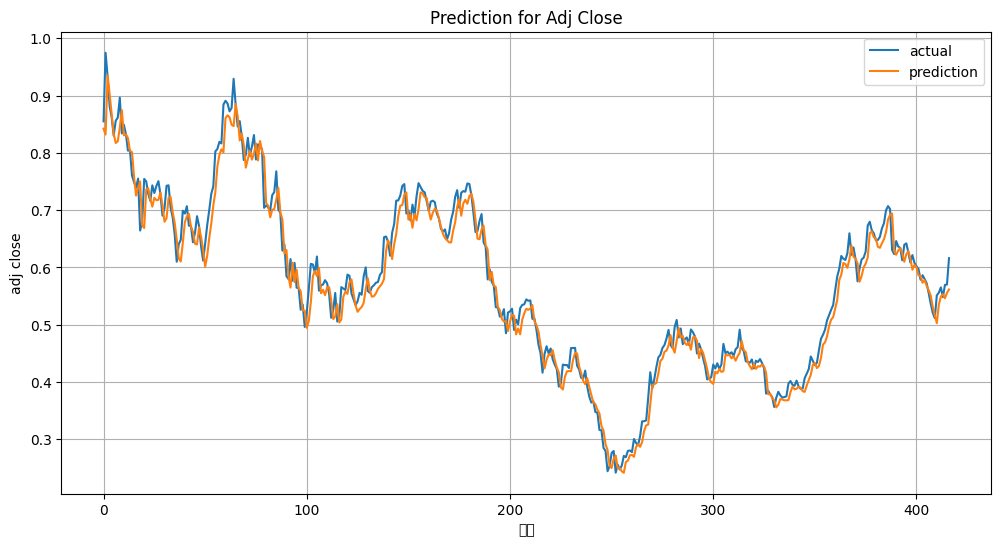

In [68]:
# 테슬라 주가 예측

pred = model.predict(x_test)

print(pred)

plt.figure(figsize=(12,6))
plt.title('Prediction for Adj Close')
plt.ylabel('adj close')
plt.xlabel('기간')
plt.plot(y_test,label='actual')
plt.plot(pred, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

In [80]:
# Extracting the dates corresponding to the test data
test_dates = stocks_tesla['Date'].iloc[800 + window_size:].reset_index(drop=True)

# Creating a DataFrame with test dates and predicted values
prediction_df = pd.DataFrame({
    'Date': test_dates,
    'Predicted Adj Close': pred.flatten()  # Flattening the predictions to match the shape
})

print(prediction_df)  # Displaying the top rows of the prediction DataFrame


file_path = "C:\\Users\\yss06\\Desktop\\python\\pred.csv"
prediction_df.to_csv(file_path, index=False)


           Date  Predicted Adj Close
0    2021-12-31             0.842215
1    2022-01-03             0.831883
2    2022-01-04             0.935434
3    2022-01-05             0.902014
4    2022-01-06             0.866695
..          ...                  ...
412  2023-08-23             0.549195
413  2023-08-24             0.553151
414  2023-08-25             0.546141
415  2023-08-28             0.555517
416  2023-08-29             0.561399

[417 rows x 2 columns]


In [75]:
# Create a new scaler for the 'Adj Close' column only
adj_close_scaler = MinMaxScaler()


adj_close_scaler.min_, adj_close_scaler.scale_ = scaler.min_[-2], scaler.scale_[-2]  # Extracting the scaling info for 'Adj Close'

# Inverse transform the normalized predictions using the new scaler
original_predictions = adj_close_scaler.inverse_transform(normalized_predictions)

# Add the original predictions to the DataFrame
prediction_df['Original Predicted Adj Close'] = original_predictions

print(prediction_df)# Displaying the top rows of the prediction DataFrame with original values


           Date  Predicted Adj Close  Original Predicted Adj Close
0    2021-12-31             0.842215                    347.165588
1    2022-01-03             0.831883                    343.052979
2    2022-01-04             0.935434                    384.270325
3    2022-01-05             0.902014                    370.967682
4    2022-01-06             0.866695                    356.909424
..          ...                  ...                           ...
412  2023-08-23             0.549195                    230.532349
413  2023-08-24             0.553151                    232.106857
414  2023-08-25             0.546141                    229.316574
415  2023-08-28             0.555517                    233.048569
416  2023-08-29             0.561399                    235.390015

[417 rows x 3 columns]
